<a href="https://colab.research.google.com/github/Jamie3099/JamieGISWork/blob/Jamie3099-project/BarleyFinished.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import folium
import numpy as np

In [24]:
url = "https://raw.githubusercontent.com/Jamie3099/JamieGISWork/Jamie3099-project/Archaeobotany%202.csv"

crops = pd.read_csv(url)

crops.head()


,site code,latitude,longitude,biblio code,amal per,presv,samp count,divrs,barley awn,barley lemma bases,barley rachis,culm nodes,f-t wheat rachis,gw glume bases,wheat indet rachis,cereal indet grain,barley grain,f-t wheat grain,gw grain,millet,oat grain,wheat indet gr,wild einkorn,caper,cucumber,date,fig,grape,hazelnut,olive,pear,pistachio,pomegranate,flax/linseed,sesame,bitter vetch,celtic bean,chickpea,common pea,grass pea,lentil,coriander,cumin,wild/weed
0,agra,33.34,44.46,"Jacobsen, 1982",Uruk,imp,1.0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,muqa,30.56,46.08,"Jacobsen, 1982",Ubaid,imp,2.0,3,0,0,0,0,0,0,0,0,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,muqa,30.56,46.08,"Ellison, 1978",E Dynastic,cpr,9.0,6,0,0,0,0,0,0,0,0,2,0,0,0,0,2,0,0,0,3,0,0,0,0,3,0,0,0,0,0,0,0,1,0,0,0,0,1
3,muqa,30.56,46.08,"Jacobsen, 1982",E Dynastic,imp,1.0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,muqa,30.56,46.08,"Ellison, 1978",E Dynastic,imp/m,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [25]:
barley = crops[['site code', 'amal per', 'latitude', 'longitude', 'barley grain']]
barley.head()

,site code,amal per,latitude,longitude,barley grain
0,agra,Uruk,33.34,44.46,1
1,muqa,Ubaid,30.56,46.08,2
2,muqa,E Dynastic,30.56,46.08,2
3,muqa,E Dynastic,30.56,46.08,1
4,muqa,E Dynastic,30.56,46.08,0


In [26]:
!pip install geopandas

In [0]:
%matplotlib inline
import geopandas as gpd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [28]:
cmap = gpd.GeoDataFrame(
    crops, geometry=gpd.points_from_xy(crops.longitude, crops.latitude))
print(cmap.head())

  site code  latitude  longitude  ... cumin wild/weed                   geometry
0      agra     33.34      44.46  ...     0         0  POINT (44.46000 33.34000)
1      muqa     30.56      46.08  ...     0         0  POINT (46.08000 30.56000)
2      muqa     30.56      46.08  ...     0         1  POINT (46.08000 30.56000)
3      muqa     30.56      46.08  ...     0         0  POINT (46.08000 30.56000)
4      muqa     30.56      46.08  ...     0         0  POINT (46.08000 30.56000)

[5 rows x 45 columns]


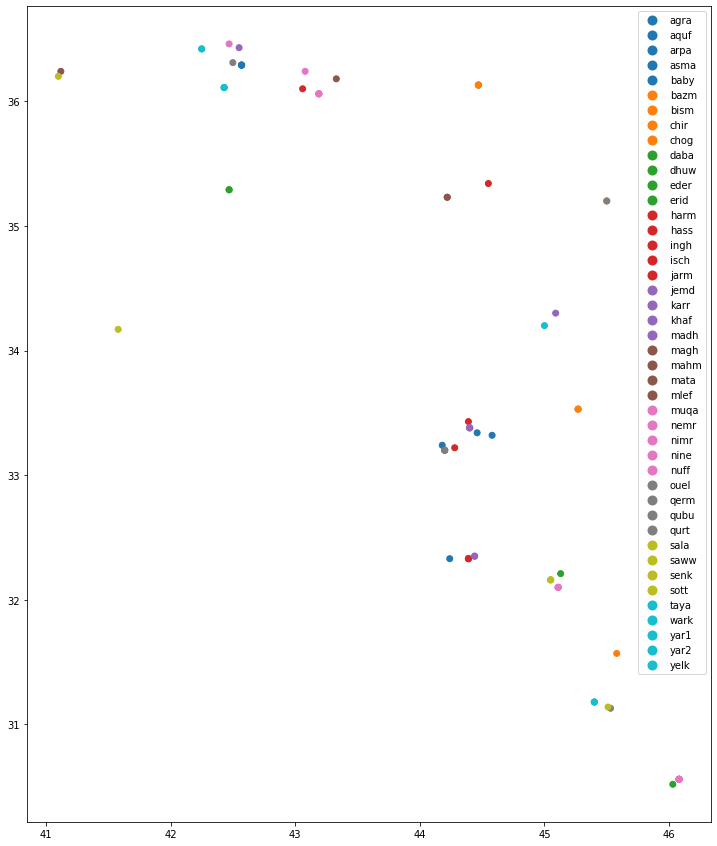

In [29]:
cmap.plot(column='site code', categorical=True, legend=True, figsize=(15,15))

In [30]:
bmap = gpd.GeoDataFrame(
    barley, geometry=gpd.points_from_xy(barley.longitude, barley.latitude))
print(bmap.head())

  site code    amal per  ...  barley grain                   geometry
0      agra        Uruk  ...             1  POINT (44.46000 33.34000)
1      muqa       Ubaid  ...             2  POINT (46.08000 30.56000)
2      muqa  E Dynastic  ...             2  POINT (46.08000 30.56000)
3      muqa  E Dynastic  ...             1  POINT (46.08000 30.56000)
4      muqa  E Dynastic  ...             0  POINT (46.08000 30.56000)

[5 rows x 6 columns]


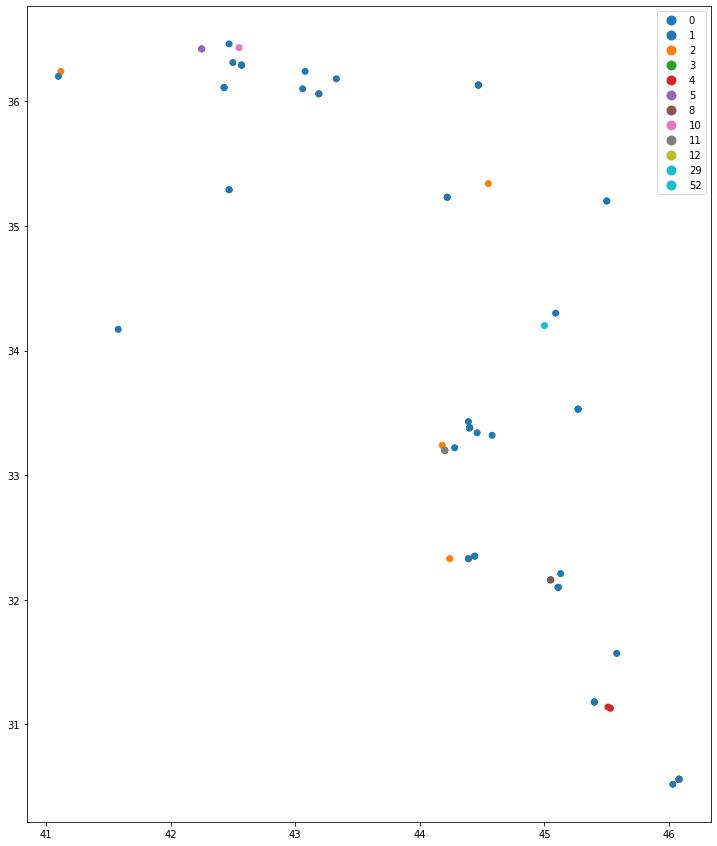

In [31]:
bmap.plot(column='barley grain', categorical=True, legend=True, figsize=(15,15))

In [0]:
from folium import plugins

In [0]:
from folium.plugins import HeatMapWithTime
from folium.plugins import HeatMap
from folium.plugins import MeasureControl

In [34]:
location_survey=barley['latitude'].mean(), barley['longitude'].mean()
print(location_survey)

(33.7778481012658, 44.239493670886084)


In [0]:
def generateBaseMap(default_location=[33.7778481012658, 44.239493670886084], default_zoom_start=7.9):
    base_map = folium.Map(location=default_location, control_scale=True, zoom_start=default_zoom_start)
    return base_map

In [45]:
base_map = generateBaseMap()
base_map

In [38]:
barleyED = barley[(barley['amal per']=="E Dynastic") ]

barleyED.head()

,site code,amal per,latitude,longitude,barley grain,geometry
2,muqa,E Dynastic,30.56,46.08,2,POINT (46.08000 30.56000)
3,muqa,E Dynastic,30.56,46.08,1,POINT (46.08000 30.56000)
4,muqa,E Dynastic,30.56,46.08,0,POINT (46.08000 30.56000)
24,chog,E Dynastic,33.53,45.27,0,POINT (45.27000 33.53000)
64,sala,E Dynastic,32.16,45.05,52,POINT (45.05000 32.16000)


In [39]:
barleyakk = barley[(barley['amal per']=="Akkadian") ]
barleyakk.head()

,site code,amal per,latitude,longitude,barley grain,geometry
5,muqa,Akkadian,30.56,46.08,0,POINT (46.08000 30.56000)
6,muqa,Akkadian,30.56,46.08,2,POINT (46.08000 30.56000)
14,asma,Akkadian,33.32,44.58,1,POINT (44.58000 33.32000)
19,bazm,Akkadian,36.13,44.47,1,POINT (44.47000 36.13000)
30,harm,Akkadian,33.22,44.28,0,POINT (44.28000 33.22000)


In [40]:
barleyNA = barley[(barley['amal per']=="Neo Assyrian") ]
barleyNA.head()

,site code,amal per,latitude,longitude,barley grain,geometry
8,muqa,Neo Assyrian,30.56,46.08,1,POINT (46.08000 30.56000)
15,baby,Neo Assyrian,32.33,44.24,2,POINT (44.24000 32.33000)
20,bism,Neo Assyrian,31.57,45.58,1,POINT (45.58000 31.57000)
46,mahm,Neo Assyrian,33.20,44.20,3,POINT (44.20000 33.20000)
52,nimr,Neo Assyrian,36.06,43.19,12,POINT (43.19000 36.06000)


In [46]:
base_map = generateBaseMap()

ED = HeatMap(data=barleyED[['latitude', 'longitude']].groupby(['latitude', 'longitude']).sum().reset_index().values.tolist(), radius=8, max_zoom=13).add_to(base_map)
Akk = HeatMap(data=barleyakk[['latitude', 'longitude']].groupby(['latitude', 'longitude']).sum().reset_index().values.tolist(), radius=8, max_zoom=13).add_to(base_map)
NA = HeatMap(data=barleyNA[['latitude', 'longitude']].groupby(['latitude', 'longitude']).sum().reset_index().values.tolist(), radius=8, max_zoom=13).add_to(base_map)

ED.layer_name = 'Early Dynastic'
Akk.layer_name = 'Akkadian'
NA.layer_name = 'Neo Assyrian'

folium.LayerControl().add_to(base_map)

In [47]:
base_map